In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


In [23]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
df_2 = df.drop(columns=["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Embarked"], axis=1)
# I don't need these columns for this model
df_2

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [25]:
group_by_survived = df_2.groupby('Survived').size()
group_by_survived

Survived
0    549
1    342
dtype: int64

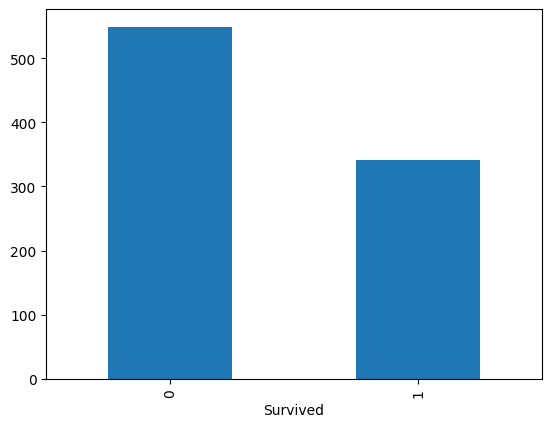

In [26]:
group_by_survived.plot(kind="bar", stacked=False)
plt.show()

In [27]:
survived_based_gender = df_2.groupby(['Survived', 'Sex']).size().unstack()
survived_based_gender

Sex,female,male
Survived,,
0,81,468
1,233,109


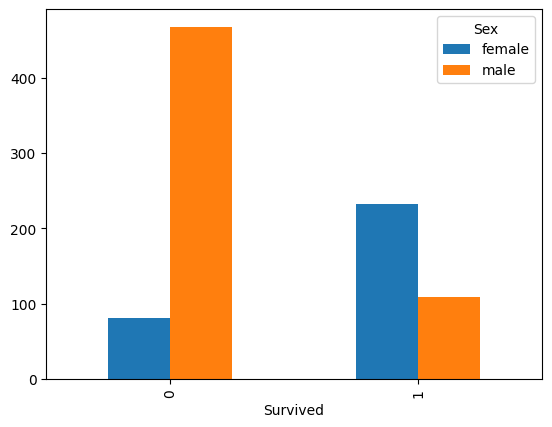

In [28]:
survived_based_gender.plot(kind="bar", stacked=False)
plt.show()

In [29]:
survived_based_pclass = df_2.groupby(['Survived', 'Pclass']).size().unstack()
survived_based_pclass

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


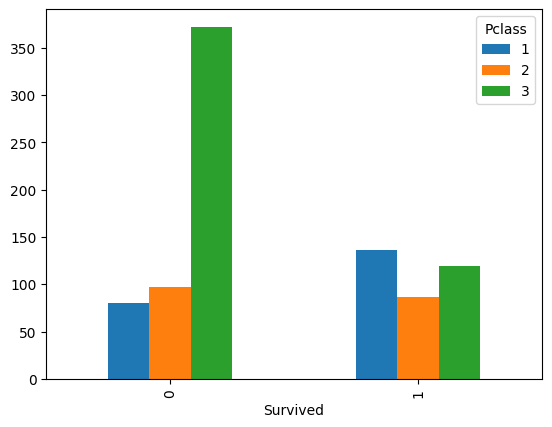

In [30]:
survived_based_pclass.plot(kind="bar", stacked=False)
plt.show()

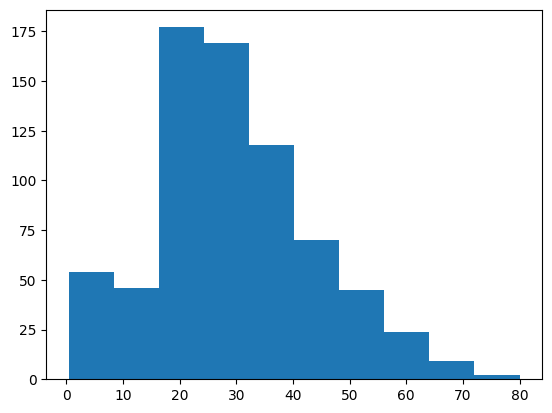

In [31]:
plt.hist(df_2["Age"].dropna())
plt.show()

In [32]:
df_2.groupby(['Survived', 'Age']).size().unstack()

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,2.0,7.0,1.0,3.0,NaN,...,2.0,NaN,2.0,3.0,1.0,2.0,1.0,2.0,1.0,NaN
1,1.0,1.0,2.0,2.0,1.0,5.0,3.0,5.0,7.0,4.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [33]:
df_2.shape

(891, 5)

In [34]:
df_2.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [35]:
df_2.dropna().groupby('Pclass').describe()["Age"]

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [37]:
def fillna_age(cols):
    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age
    
df_2.Age = df_2[['Age','Pclass']].apply(fillna_age, axis=1)

C:\Users\USER\AppData\Local\Temp\ipykernel_5184\2472607281.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = cols[0]
C:\Users\USER\AppData\Local\Temp\ipykernel_5184\2472607281.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass = cols[1]


In [38]:
df_2

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,24.0,23.4500
889,1,1,male,26.0,30.0000


In [39]:
df_age_less_than_1 = df_2[df_2.Age < 1]
df_age_less_than_1

,Survived,Pclass,Sex,Age,Fare
78,1,2,male,0.83,29.0000
305,1,1,male,0.92,151.5500
469,1,3,female,0.75,19.2583
644,1,3,female,0.75,19.2583
755,1,2,male,0.67,14.5000
803,1,3,male,0.42,8.5167
831,1,2,male,0.83,18.7500


In [40]:
df_2 = df_2[df_2.Age >= 1]
df_2

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,24.0,23.4500
889,1,1,male,26.0,30.0000


In [41]:
label = LabelEncoder()
df_2.Sex = label.fit_transform(df_2.Sex)
df_2

C:\Users\USER\AppData\Local\Temp\ipykernel_5184\4289874470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.Sex = label.fit_transform(df_2.Sex)


,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500
...,...,...,...,...,...
886,0,2,1,27.0,13.0000
887,1,1,0,19.0,30.0000
888,0,3,0,24.0,23.4500
889,1,1,1,26.0,30.0000


In [42]:
x_train, x_test, y_train, y_test = train_test_split(df_2.drop('Survived', axis= 1), df_2.Survived, test_size=0.2, random_state=42)

In [43]:
model = DecisionTreeClassifier(criterion="gini") # by default the cirterion is gini you can also use entropy
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
model.score(x_test, y_test)

0.7966101694915254

In [45]:
y_test.values

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1], dtype=int64)

In [46]:
y_predicted = model.predict(x_test)
y_predicted

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0], dtype=int64)

In [47]:
cf = confusion_matrix(y_test, y_predicted)
cf

array([[93, 17],
       [19, 48]], dtype=int64)

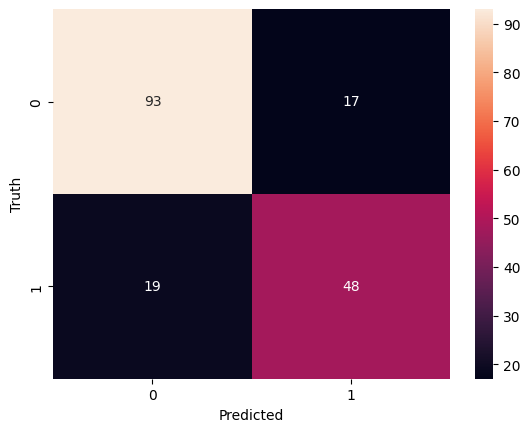

In [48]:
import seaborn as sns
sns.heatmap(cf, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()